In [2]:
# Используемые библиотеки
import pandas
import math
import matplotlib.pyplot as plt
from more_itertools import chunked

In [3]:
# Вариант 2, набор данных по фондовооруженности предприятия 100 наблюдений
with open("var.txt") as f:
    vals = list(map(lambda x: float(x), f.read().split()))
pandas.DataFrame(list(chunked(vals, 10)))

,0,1,2,3,4,5,6,7,8,9
0,18.67,12.46,18.87,11.61,23.51,11.75,16.27,16.51,14.67,16.15
1,17.88,16.85,9.06,16.35,15.97,10.10,17.78,14.52,14.56,12.59
2,18.66,14.19,13.97,15.35,12.85,13.18,18.39,17.26,14.90,15.79
3,14.43,15.39,14.85,12.48,12.97,12.04,16.26,11.74,20.78,14.27
4,15.19,14.59,19.91,9.80,12.65,15.91,11.37,18.57,20.90,12.15
5,15.42,20.42,12.70,10.98,11.74,15.91,10.67,14.21,17.50,15.98
6,11.26,17.07,18.83,17.06,12.61,8.86,18.67,17.79,11.42,15.36
7,14.95,15.55,11.27,15.41,16.29,12.44,16.50,16.74,5.21,18.03
8,12.29,10.74,11.25,14.57,13.16,15.32,18.11,11.77,11.51,13.56
9,15.74,12.44,14.62,14.97,12.21,12.06,15.60,13.27,15.16,16.99


In [4]:
# 1. Ранжировать дискретный массив данных в порядке возрастания.
vals.sort()
pandas.DataFrame(list(chunked(vals, 10)))

,0,1,2,3,4,5,6,7,8,9
0,5.21,8.86,9.06,9.80,10.10,10.67,10.74,10.98,11.25,11.26
1,11.27,11.37,11.42,11.51,11.61,11.74,11.74,11.75,11.77,12.04
2,12.06,12.15,12.21,12.29,12.44,12.44,12.46,12.48,12.59,12.61
3,12.65,12.70,12.85,12.97,13.16,13.18,13.27,13.56,13.97,14.19
4,14.21,14.27,14.43,14.52,14.56,14.57,14.59,14.62,14.67,14.85
5,14.90,14.95,14.97,15.16,15.19,15.32,15.35,15.36,15.39,15.41
6,15.42,15.55,15.60,15.74,15.79,15.91,15.91,15.97,15.98,16.15
7,16.26,16.27,16.29,16.35,16.50,16.51,16.74,16.85,16.99,17.06
8,17.07,17.26,17.50,17.78,17.79,17.88,18.03,18.11,18.39,18.57
9,18.66,18.67,18.67,18.83,18.87,19.91,20.42,20.78,20.90,23.51


In [41]:
# 2. Составить интервальный вариационный ряд по ранжированному дискретному массиву.
n = len(vals) # Количество элементов
xmin = min(vals) # Минимальное значение
xmax = max(vals) # Максимальное значение
r = round(1 + 3.3*math.log10(n)) # Количество отрезков
R = xmax - xmin # Длина всего отрезка
delta = R/r # Длина отрезка интервала
xni = [list() for _ in range(r)] # Для хранения значений входящих в интервал
start = xmin # Начало интервала
stop = start + delta # Конец интервала
ranges = [] # Отрезки
for i in range(r): # Проходим каждый отрезок
    for x in vals: # Проходим по каждому значению
       if start <= x and (x < stop or i == r - 1): # Проверяем на вхождение в отрезок
            xni[i].append(x) # Добавляем в массив значение входящего в интервал
    ranges.append([start, stop]) # Добавляем отрезок
    start = stop # Сдвигаем начало отрезка
    stop += delta # Сдвигаем конец отрезка
ni = [len(xni[i]) for i in range(r)] # Количество значений в интервале
wi = [ni[i]/n for i in range(r)] # Высчитываем относительную вероятность
hi = [(wi[i]/delta)*100 for i in range(r)] # Высчитываем высоту прямоугольника
xi = [sum(ranges[i])/2 for i in range(r)] # Вычитываем середины интервалов
xavg = sum(vals)/n # Среднее значение
xwi = [xi[i]*wi[i] for i in range(r)]
x2wi = [(xi[i]**2)*wi[i] for i in range(r)]
xmxavg3wi = [((xi[i] - xavg)**3)*wi[i] for i in range(r)]
xmxavg4wi = [((xi[i] - xavg)**4)*wi[i] for i in range(r)]
winak = [sum(wi[:i + 1]) for i in range(r)]
print("Выводим таблицу для характеристики интервала")
display(pandas.DataFrame(list(zip(
    list(map(lambda x: str(round(x[0], 3)) + "-" + str(round(x[1], 3)), ranges)) + ["Сумма"],
    list(map(lambda x: round(x, 3), xi)) + ["-"],
    ni + [sum(ni)],
    wi + [sum(wi)],
    winak + ["-"],
    list(map(lambda x: round(x, 3), xwi)) + [round(sum(xwi), 3)],
    list(map(lambda x: round(x, 3), x2wi)) + [round(sum(x2wi), 3)],
    list(map(lambda x: round(x, 3), xmxavg3wi)) + [round(sum(xmxavg3wi), 3)],
    list(map(lambda x: round(x, 3), xmxavg4wi)) + [round(sum(xmxavg4wi), 3)],
    list(map(lambda x: round(x, 3), hi)) + ["-"]
)), columns=[
    "Частичный интервал Δ=" + str(round(delta, 3)),
    "Середины интервалов, xi",
    "Абсолютные частоты ni",
    "Отн. частоты wi",
    "Накопл. отн. частоты wi^нак",
    "xi * wi",
    "(xi)^2 * wi",
    "(xi - xср)^3 * wi",
    "(xi - xср)^4 * wi",
    "Высота hi"
]))

Выводим таблицу для характеристики интервала


,Частичный интервал Δ=2.288,"Середины интервалов, xi",Абсолютные частоты ni,Отн. частоты wi,Накопл. отн. частоты wi^нак,xi * wi,(xi)^2 * wi,(xi - xср)^3 * wi,(xi - xср)^4 * wi,Высота hi
0,5.21-7.498,6.354,1,0.01,0.01,0.064,0.404,-5.795,48.318,0.437
1,7.498-9.785,8.641,2,0.02,0.03,0.173,1.493,-4.429,26.792,0.874
2,9.785-12.072,10.929,18,0.18,0.21,1.967,21.499,-9.586,36.067,7.869
3,12.072-14.36,13.216,21,0.21,0.42,2.775,36.681,-0.674,0.994,9.18
4,14.36-16.648,15.504,34,0.34,0.76,5.271,81.725,0.182,0.148,14.863
5,16.648-18.935,17.791,19,0.19,0.95,3.380,60.140,5.661,17.550,8.306
6,18.935-21.223,20.079,4,0.04,0.99,0.803,16.126,6.255,33.702,1.749
7,21.223-23.51,22.366,1,0.01,1.0,0.224,5.002,4.521,34.701,0.437
8,Сумма,-,100,1.00,-,14.657,223.070,-3.864,198.273,-


Выводим полученную гистограмму


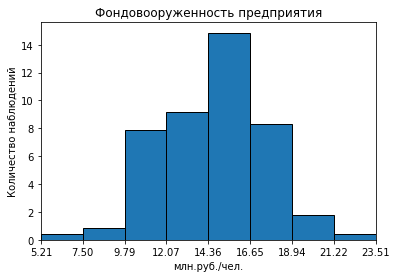

In [42]:
fig, ax = plt.subplots()
ax.bar(xi, hi, delta, edgecolor="black")
ax.set_xlim(xmin, xmax)
ax.set_xlabel('млн.руб./чел.')
ax.set_ylabel('Количество наблюдений')
ax.set_title('Фондовооруженность предприятия')
ax.set_xticks([xmin] + list(map(lambda x: x[1], ranges)))
#ax.set_yticks([0] + hi)
print("Выводим полученную гистограмму")

In [4]:
xmin, xmax, delta

(5.21, 23.51, 6.1000000000000005)